랜덤 포레스트 - MSE : 28.63, R2 : 0.66
Linear Regression - MSE : 36.34, R2 : 0.57
Decision Tree - MSE : 27.30, R2 : 0.68

최적 모델 :  Decision Tree


c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\AIProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


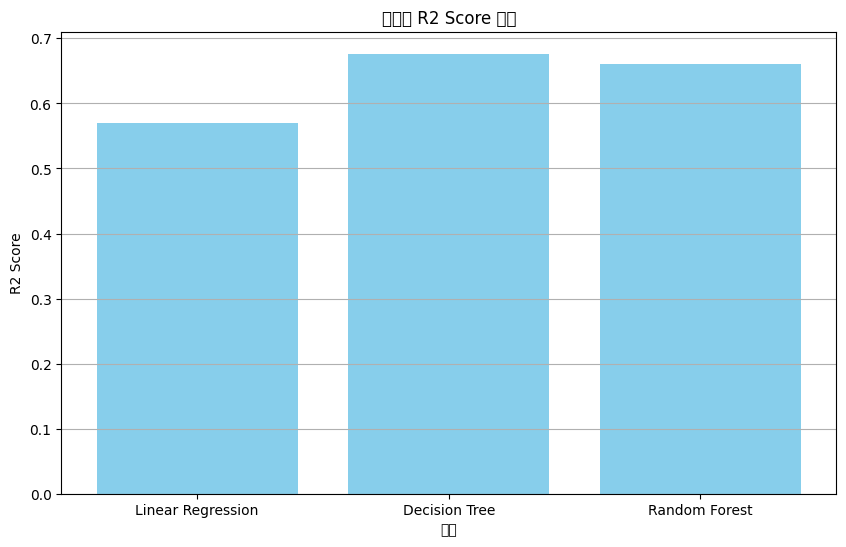


최적 하이퍼파라미터 :  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
튜닝된 랜덤 포레스트 - MSE : 28.63, R2: 0.66


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('dataset/HousingData.csv')

# 데이터 전처리
data = data.dropna() # 결측값 제거
X = data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y = data['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_estimators : 모델을 구성하는 경정 틀의 갯수 수
rf_model.fit(X_train, y_train) # fit : 자동 학습
rf_y_pred = rf_model.predict(X_test) # predict : 결과값 예측

# 랜덤 포레스트 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 - MSE : {rf_mse:.2f}, R2 : {rf_r2:.2f}")

# 2. 다른 모델 비교
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42)
}

result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    result[name] = {"MSE":mse, "R2":r2}
    print(f"{name} - MSE : {mse:.2f}, R2 : {r2:.2f}")
    
# 3. 최적 모델 선택 및 시각화
result["Random Forest"] = {"MSE":rf_mse, "R2":rf_r2}
best_model = max(result, key=lambda x: result[x]['R2'])
print("\n최적 모델 : ", best_model)

# 결과 시각화
r2_scores = [result["R2"] for result in result.values()]
model_names = list(result.keys())
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()

# 4. 랜덤 포레스트 하이퍼파라미터 튜닝 (옵션)
param_grid = {
    'n_estimators' : [50, 100, 200], # 갯수
    'max_depth' : [None, 10, 20], # 깊이
    'min_samples_split' : [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
print("\n최적 하이퍼파라미터 : ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
tuned_rf_y_pred = best_rf_model.predict(X_test)

#튜닝된 모델 평가
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_y_pred)
tuned_rf_r2 = r2_score(y_test, tuned_rf_y_pred)
print(f"튜닝된 랜덤 포레스트 - MSE : {tuned_rf_mse:.2f}, R2: {tuned_rf_r2:.2f}")